In [1]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!pip install kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d grouplens/movielens-20m-dataset
!unzip /content/movielens-20m-dataset.zip


Saving kaggle.json to kaggle.json
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 91% 178M/195M [00:00<00:00, 234MB/s]
100% 195M/195M [00:00<00:00, 215MB/s]
Archive:  /content/movielens-20m-dataset.zip
  inflating: genome_scores.csv       
  inflating: genome_tags.csv         
  inflating: link.csv                
  inflating: movie.csv               
  inflating: rating.csv              
  inflating: tag.csv                 


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('rating.csv')
df

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [2]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

In [3]:
df

,userId,movieId,rating,timestamp
4182421,28507,1176,4.0,1995-01-09 11:46:44
18950979,131160,1079,3.0,1995-01-09 11:46:49
18950936,131160,47,5.0,1995-01-09 11:46:49
18950930,131160,21,3.0,1995-01-09 11:46:49
12341178,85252,45,3.0,1996-01-29 00:00:00
...,...,...,...,...
7819902,53930,118706,3.5,2015-03-31 06:00:51
2508834,16978,2093,3.5,2015-03-31 06:03:17
12898546,89081,55232,3.5,2015-03-31 06:11:26
12898527,89081,52458,4.0,2015-03-31 06:11:28


In [4]:
df['timestamp_int'] = df['timestamp'].values.astype(np.int64) // 10 ** 9
df.head()

,userId,movieId,rating,timestamp,timestamp_int
4182421,28507,1176,4.0,1995-01-09 11:46:44,789652004
18950979,131160,1079,3.0,1995-01-09 11:46:49,789652009
18950936,131160,47,5.0,1995-01-09 11:46:49,789652009
18950930,131160,21,3.0,1995-01-09 11:46:49,789652009
12341178,85252,45,3.0,1996-01-29 00:00:00,822873600


(array([ 239125.,  680732.,  279252., 1430997.,  883398., 4291193.,
        2200156., 5561926., 1534824., 2898660.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

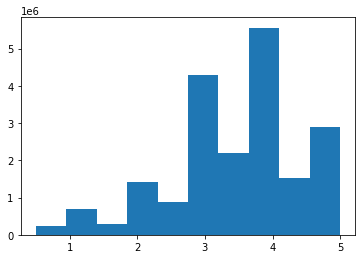

In [5]:
import matplotlib.pyplot as plt

plt.hist(df['rating'].values)

(array([1659326.,  984706., 3269908., 2069282., 2297922., 2946227.,
        2207941., 1810870., 1456931., 1297150.]),
 array([7.89652004e+08, 8.53465204e+08, 9.17278404e+08, 9.81091603e+08,
        1.04490480e+09, 1.10871800e+09, 1.17253120e+09, 1.23634440e+09,
        1.30015760e+09, 1.36397080e+09, 1.42778400e+09]),
 <a list of 10 Patch objects>)

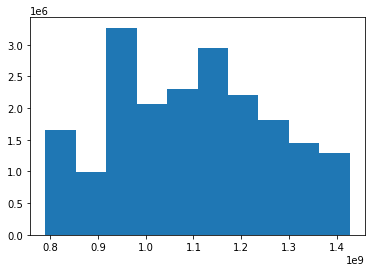

In [6]:
plt.hist(df['timestamp_int'].values)

In [7]:
df = df.rename(columns={"userId": "userId:token", "movieId": "movieId:token", "timestamp_int": "timestamp:float"})


In [8]:
df.head()

,userId:token,movieId:token,rating,timestamp,timestamp:float
4182421,28507,1176,4.0,1995-01-09 11:46:44,789652004
18950979,131160,1079,3.0,1995-01-09 11:46:49,789652009
18950936,131160,47,5.0,1995-01-09 11:46:49,789652009
18950930,131160,21,3.0,1995-01-09 11:46:49,789652009
12341178,85252,45,3.0,1996-01-29 00:00:00,822873600


In [9]:
test_part = 0.2
train_len = int(df.shape[0] * (1 - test_part))
test_len = df.shape[0] - train_len 
df_train, df_test = df.drop(['timestamp'], axis=1).head(train_len), df.drop(['timestamp'], axis=1).tail(test_len)

In [10]:
df_train.head()

,userId:token,movieId:token,rating,timestamp:float
4182421,28507,1176,4.0,789652004
18950979,131160,1079,3.0,789652009
18950936,131160,47,5.0,789652009
18950930,131160,21,3.0,789652009
12341178,85252,45,3.0,822873600


(array([1658022., 1603648., 1556707., 1587068., 1582019., 1645064.,
        1602175., 1585145., 1604241., 1576121.]),
 array([1.000000e+00, 1.385020e+04, 2.769940e+04, 4.154860e+04,
        5.539780e+04, 6.924700e+04, 8.309620e+04, 9.694540e+04,
        1.107946e+05, 1.246438e+05, 1.384930e+05]),
 <a list of 10 Patch objects>)

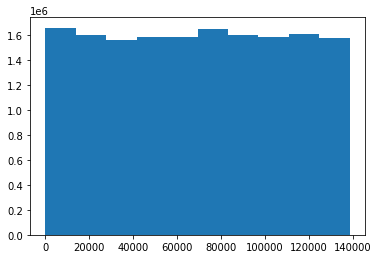

In [11]:
plt.hist(df_train['userId:token'].values)

In [12]:
df['userId:token'].min(), df['userId:token'].max(), df['movieId:token'].min(), df['movieId:token'].max()

(1, 138493, 1, 131262)

In [13]:
import torch

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [14]:
import torch
import torch.nn as nn
from tqdm.auto import trange
import random


class LMDataset(torch.utils.data.Dataset):
    def __init__(self, df, n_users_total, n_items_total, batch_size, max_len):
        self.n_users_total = n_users_total
        self.n_items_total = n_items_total
        self.batch_size = batch_size
        self.users_history = [[] for _ in range(self.n_users_total)]
        self.max_len = max_len
        for i in trange(df.shape[0]):
            cur_user = df['userId:token'].iloc[i]
            cur_item = df['movieId:token'].iloc[i]
            cur_rating = df['rating'].iloc[i]
            cur_ts = df['timestamp:float'].iloc[i]
            self.users_history[cur_user].append((cur_item, cur_rating, cur_ts))
        

    def __getitem__(self, index):
        batch_users = set()
        while len(batch_users) < self.batch_size:
            v = random.randint(0, self.n_users_total) - 1
            if v not in batch_users:
               batch_users.add(v)
        batch_users = list(batch_users)
        max_len = 0
        for u in batch_users:
            max_len = max(max_len, len(self.users_history[u]))
        max_len = min(max_len, self.max_len)
        history_input, history_output, mask = torch.zeros((self.batch_size, max_len + 1), dtype=torch.long), \
                                              torch.zeros((self.batch_size, max_len + 1), dtype=torch.long), \
                                              torch.zeros((self.batch_size, max_len + 1), dtype=torch.long)
        metadata = torch.zeros((self.batch_size, max_len + 1, 2))
        for i, u in enumerate(batch_users):
            for j in range(min(self.max_len,len(self.users_history[u]))):
                cur_item, cur_rating, cur_ts = self.users_history[u][j]
                history_input[i][j + 1] = cur_item
                history_output[i][j] = cur_item
                mask[i][j] = 1
                metadata[i][j + 1][0] = cur_rating
                metadata[i][j + 1][1] = cur_ts
        return {
            "history_input" : history_input.to(device),
            "history_output": history_output.to(device),
            "mask" : mask.to(device),
            "metadata": metadata.to(device)
        }

    def __len__(self):
        return self.n_users_total // self.batch_size + 1



In [15]:
train_dataset = LMDataset(df_train, df['userId:token'].max() + 1, df['movieId:token'].max() + 1, 8, 140)

  0%|          | 0/16000210 [00:00<?, ?it/s]

In [16]:
train_dataset[0]

{'history_input': tensor([[    0,    25,   780,   123,     1,   785,     6,   648,    32,    81,
             29,   799,   832,   990,   260,  1573,  1570,  1552,   858,   778,
           1073,  1210,  1500,  1407,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
         [    0,   509,   357,   539,    36,   587,   597,   246,   586,   348,
              6,   474,   377,   265,   350,   261,   141,   440,   480,   337,
            282,   356,   364,   454,   111,    21,   457,   593,   339,   161,
            318,   590,   592,   150,   380,     0,     0,     0,     0,     0,
              0,     0

In [17]:
from unicodedata import bidirectional
class GRU4Rec(nn.Module):
    def __init__(self, num_embeddings, embedding_dim, hidden_dim, num_layers, hidden_size, output_items):
        super().__init__()
        self.embedding = nn.Embedding(num_embeddings, embedding_dim)
        self.positional_encoding = nn.Linear(2, embedding_dim)
        self.gru = nn.GRU(batch_first=True, 
                          num_layers=num_layers,
                          input_size=embedding_dim,
                          hidden_size=hidden_size,
                          bidirectional=True)
        
        self.last = nn.Linear(2 * hidden_size, output_items)

    def forward(self, history_input, metadata):
        hidden = self.embedding(history_input) + self.positional_encoding(metadata)
        output_gru, _ = self.gru(hidden)
        return self.last(output_gru)

In [18]:
model = GRU4Rec(df['movieId:token'].max() + 1, 64, 64, 2, 64, df['movieId:token'].max() + 1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
criterion = nn.CrossEntropyLoss()

In [45]:
from tqdm.auto import trange, tqdm 

epochs = 3

history = []

for _ in trange(epochs):
    for i in trange(len(train_dataset)):
        batch = train_dataset[i]
        optimizer.zero_grad()
        output_model = model(batch['history_input'], batch['metadata'])
        total_len = len(batch['history_output'].reshape(-1))
        loss = criterion(output_model.reshape(total_len, -1), batch['history_output'].reshape(-1))
        history.append(loss.item())
        loss.backward()
        optimizer.step()

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/17312 [00:00<?, ?it/s]

  0%|          | 0/17312 [00:00<?, ?it/s]

  0%|          | 0/17312 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
torch.save(model, '/content/drive/MyDrive/movielens_gru.pt')

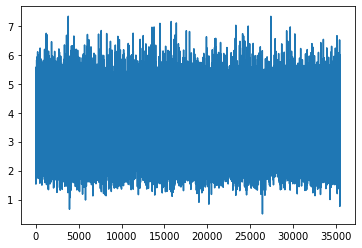

In [48]:
plt.plot(np.arange(len(history)), history)

In [49]:
@torch.no_grad()
def reccomend_for_user(user_id, k):
    users_history = train_dataset.users_history[user_id]
    answer = []
    mark = 5.0
    ts = users_history[-1][2] if len(users_history) > 0 else 0

    for i in range(k):
        max_len = len(users_history)
        history_input = torch.zeros((1, max_len + 1), dtype=torch.long).to(device)
        metadata = torch.zeros((1, max_len + 1, 2)).to(device)
        for j in range(len(users_history)):
            cur_item, cur_rating, cur_ts = users_history[j]
            history_input[0][j + 1] = cur_item
            metadata[0][j + 1][0] = cur_rating
            metadata[0][j + 1][1] = cur_ts
        output = model(history_input, metadata)[0][-1][1:].argmax(-1).item()
        answer.append(output)
        users_history.append((output, mark, ts))
    return answer

In [50]:
from math import log2

def apk(pred, target, k):
    if len(pred) >= k:
        pred = pred[:k]

    ans, cnt = 0, 0
    tot = len(pred) 
    s = set()
    for i in range(len(pred)):
        if pred[i] in target and pred[i] not in s:
            cnt += 1
            ans += cnt / (i + 1)
            s.add(pred[i])
    return ans / tot


def mapk(pred, target, k):
    assert len(pred) == len(target)
    sum_metric = 0
    for cur_pred, cur_target in zip(pred, target):
        sum_metric += apk(cur_pred, cur_target, k)
    return sum_metric / len(pred) 


def mr(pred, target):
    ans, cnt = 0, 0
    tot = len(pred)
    s = set()
    for i in range(len(pred)):
        if pred[i] in target and pred[i] not in s:
            ans += 1 / (i + 1)
            s.add(pred[i])
            break
    return ans

def mrr(pred, target):
    assert len(pred) == len(target)
    sum_metric = 0
    for cur_pred, cur_target in zip(pred, target):
        sum_metric += mr(cur_pred, cur_target)
    return sum_metric / len(pred) 


def ndcgunique(pred, target):
    ans, cnt = 0, 0
    tot = len(pred)
    s = set()
    for i in range(len(pred)):
        if pred[i] in target and pred[i] not in s:
            ans += 1 / (log2(i + 2))
            s.add(pred[i])
    return ans / tot

def ndcg(pred, target):
    assert len(pred) == len(target)
    sum_metric = 0
    for cur_pred, cur_target in zip(pred, target):
        sum_metric += ndcgunique(cur_pred, cur_target)
    return sum_metric / len(pred) 


def precisionunique(pred, target, k):
    if len(pred) >= k:
        pred = pred[:k]

    ans, cnt = 0, 0
    tot = len(pred)
    s = set()
    for i in range(len(pred)):
        if pred[i] in target and pred[i] not in s:
            ans += 1
            s.add(pred[i])
    return ans / tot


def precision(pred, target, k):
    assert len(pred) == len(target)
    sum_metric = 0
    for cur_pred, cur_target in zip(pred, target):
        sum_metric += precisionunique(cur_pred, cur_target, k)
    return sum_metric / len(pred) 

In [24]:
test_dataset = LMDataset(df_test, df['userId:token'].max() + 1, df['movieId:token'].max() + 1, 32, 140)

  0%|          | 0/4000053 [00:00<?, ?it/s]

In [51]:
predictions = []
target = []
k = 20
for i in trange(len(test_dataset.users_history)):
    if len(test_dataset.users_history[i]) == 0:
        continue
    out = reccomend_for_user(i, k)
    predictions.append(out)
    target.append([x[0] for x in test_dataset.users_history[i]])

  0%|          | 0/138494 [00:00<?, ?it/s]

In [52]:
for i in range(1, 20):
    print(f"precision@{i} : {precision(predictions, target, i)}")
print(f"ndcg: {ndcg(predictions, target)}")
print(f"mrr: {mrr(predictions, target)}")
for i in range(1, 20):
    print(f"mapk@{i} : {mapk(predictions, target, i)}")

precision@1 : 0.00268392800757815
precision@2 : 0.011319861067256078
precision@3 : 0.007841279865277422
precision@4 : 0.007538680138932744
precision@5 : 0.006138301231449249
precision@6 : 0.005136301441953464
precision@7 : 0.004425098109973341
precision@8 : 0.003891695610988317
precision@9 : 0.003466301792793807
precision@10 : 0.003135459425323611
precision@11 : 0.0028618997043373907
precision@12 : 0.002628670666245648
precision@13 : 0.0024361808068786837
precision@14 : 0.002273444900536762
precision@15 : 0.0021281970318914197
precision@16 : 0.0019991316703504894
precision@17 : 0.0018852504689909233
precision@18 : 0.00179103953969761
precision@19 : 0.0016967743007661558
ndcg: 0.0009619251810811867
mrr: 0.014716726217868507
mapk@1 : 0.00268392800757815
mapk@2 : 0.006338806441427218
mapk@3 : 0.004327614637055769
mapk@4 : 0.003687769708451742
mapk@5 : 0.0029729502157667368
mapk@6 : 0.0024818440164193238
mapk@7 : 0.002130516873626609
mapk@8 : 0.001866669110018494
mapk@9 : 0.001660041076155

In [53]:
for i in range(1, 40):
    print(f"precision@{i} : {precision(target, target, i)}")
print(f"ndcg: {ndcg(target, target)}")
print(f"mrr: {mrr(target, target)}")
for i in range(1, 40):
    print(f"mapk@{i} : {mapk(target, target, i)}")

precision@1 : 1.0
precision@2 : 1.0
precision@3 : 1.0
precision@4 : 1.0
precision@5 : 1.0
precision@6 : 1.0
precision@7 : 1.0
precision@8 : 1.0
precision@9 : 1.0
precision@10 : 1.0
precision@11 : 1.0
precision@12 : 1.0
precision@13 : 1.0
precision@14 : 1.0
precision@15 : 1.0
precision@16 : 1.0
precision@17 : 1.0
precision@18 : 1.0
precision@19 : 1.0
precision@20 : 1.0
precision@21 : 1.0
precision@22 : 1.0
precision@23 : 1.0
precision@24 : 1.0
precision@25 : 1.0
precision@26 : 1.0
precision@27 : 1.0
precision@28 : 1.0
precision@29 : 1.0
precision@30 : 1.0
precision@31 : 1.0
precision@32 : 1.0
precision@33 : 1.0
precision@34 : 1.0
precision@35 : 1.0
precision@36 : 1.0
precision@37 : 1.0
precision@38 : 1.0
precision@39 : 1.0
ndcg: 0.25948577327982253
mrr: 1.0
mapk@1 : 1.0
mapk@2 : 1.0
mapk@3 : 1.0
mapk@4 : 1.0
mapk@5 : 1.0
mapk@6 : 1.0
mapk@7 : 1.0
mapk@8 : 1.0
mapk@9 : 1.0
mapk@10 : 1.0
mapk@11 : 1.0
mapk@12 : 1.0
mapk@13 : 1.0
mapk@14 : 1.0
mapk@15 : 1.0
mapk@16 : 1.0
mapk@17 : 1.0
mapk